# College Completion Dataset Analysis

Welcome to this Jupyter Notebook where we'll be exploring and analyzing a college completion dataset. In today's world, college education is an important factor for social and economic mobility, however, the completion rates of college students are not always satisfactory. With the right tools and techniques, we can analyze the factors affecting graduation rates and help students succeed.

In this notebook, we'll be using Python to analyze a college completion dataset ([cc_institution_details.csv](https://data.world/databeats/college-completion)) obtained from data.world. The dataset contains information on over 3,800 degree-granting institutions in the United States, including demographic data, financial aid data, and completion rates.

In this notebook, we'll be answering three main questions based on the data:

* What effect do an institution's characteristics have on their graduation rate?
* Does the number of full-time faculty have an effect on student retention?
* Which type of institution awards the most degrees?

We'll start by exploring the dataset and cleaning the data before moving on to performing statistical analysis to answer these questions and gain insights into the underlying patterns and relationships in the data. We'll use various Python libraries such as Pandas, Numpy, and Matplotlib to perform our analysis and visualise the data using various graphs and charts.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import f_oneway, pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
sns.set_theme(style="whitegrid")

### Describe the Data

First, we'll start by importing the data as a pandas dataframe before exploring it as a whole, looking at the number of rows and columns and the basic descriptive statistics for the numerical columns. 

In [2]:
df = pd.read_csv('./cc_institution_details.csv')
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [3]:
num_rows = df.shape[0]
num_cols = df.shape[1]
num_rows, num_cols

(3798, 63)

In [4]:
df.describe()

,index,unitid,long_x,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,state_sector_ct,carnegie_ct,cohort_size
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3.798000e+03,3798.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,3798.000000,3798.000000,3467.000000
mean,1898.500000,226063.790416,-91.030391,38.134044,4476.135334,23.435176,22.845656,22.484044,6.507447e+04,61282.189837,...,6.442222,12.233704,8.641852,57.960370,9.705926,3.001481,5.909630,34.284360,232.557662,658.306028
std,1096.532489,105065.777685,15.684064,5.040303,7376.868923,10.615140,6.322818,4.770449,1.074379e+05,33295.027077,...,3.606922,6.220198,3.919950,16.368681,4.641213,2.158996,2.988662,28.311303,156.960653,961.782580
min,0.000000,100654.000000,-159.395966,19.699720,23.000000,0.500000,3.200000,16.500000,0.000000e+00,12346.000000,...,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,949.250000,155063.250000,-97.294767,34.299610,581.250000,17.300000,19.300000,21.500000,3.231125e+04,35830.000000,...,4.700000,8.325000,6.200000,51.050000,7.500000,1.525000,4.200000,14.000000,106.000000,131.000000
50%,1898.500000,198075.000000,-86.828840,38.988143,1794.500000,21.300000,22.200000,22.500000,5.057850e+04,54025.000000,...,6.400000,11.800000,8.300000,59.500000,9.700000,2.700000,5.700000,25.000000,169.000000,356.000000
75%,2847.750000,233745.000000,-79.966228,41.633128,5172.000000,26.500000,24.200000,24.600000,7.693025e+04,79310.000000,...,7.800000,15.075000,10.800000,68.075000,11.900000,3.900000,7.200000,48.000000,343.000000,782.500000
max,3797.000000,475291.000000,-67.243306,71.324702,170144.000000,137.600000,59.900000,32.800000,5.282095e+06,188870.000000,...,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,116.000000,517.000000,16229.000000


In [5]:
df.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

The dataset contains 3798 rows and 63 columns, 51 of which are numerical. Already we can see that some columns might have outliers, such as _student_count_, _awards_per_value_, _aid_value_ etc. There's also a lot of numerical columns to work with yet quite a lot of them seem to be paired i.e. there is a '_value' and '_percentile' column for the same field, which could suggest that one of them could be used for statistical analysis instead of both.

### Remove Duplicates

In [6]:
df.duplicated().sum()

0

In [7]:
df[df['chronname'].isin(df['chronname'][df['chronname'].duplicated()])]

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
3027,3027,245421,Metro Business College,Rolla,Missouri,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,100733|100928|103529|105136|108056|110501|1123...,19,81,47.6|10,NaN,20.0
3028,3028,245430,Metro Business College,Jefferson City,Missouri,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,100733|100928|103529|105136|108056|110501|1123...,19,81,57.9|10,NaN,55.0
3528,3528,444389,Anamarc College,El Paso,Texas,2-year,Private for-profit,Associates--Private For-profit,NaN,NaN,...,NaN,NaN,NaN,NaN,450447|444565|447953|145309|446817|450702|4045...,37,517,NaN,NaN,642.0
3697,3697,451945,ITT Technical Institute-Madison,Madison,Alabama,4-year,Private for-profit,Associates--Private For-profit 4-year Primaril...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9,83,NaN,NaN,NaN
3701,3701,451981,ITT Technical Institute-Madison,Madison,Wisconsin,4-year,Private for-profit,Associates--Private For-profit 4-year Primaril...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15,83,NaN,NaN,NaN
3739,3739,455673,Metro Business College,Arnold,Missouri,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19,81,92.3|10,NaN,24.0
3746,3746,456393,ITT Technical Institute-Madison,Madison,Mississippi,2-year,Private for-profit,Associates--Private For-profit 4-year Primaril...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6,83,78.8|10,NaN,NaN
3784,3784,459815,Anamarc College,Santa Teresa,New Mexico,4-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8,81,NaN,NaN,NaN


No duplicated rows in the dataset so we don't need to drop any rows at this point. There are 8 rows that have a duplicated _chronname_ (institution name) however they all have unique _unitid_ (Department of Education Unit ID number) so are likely to be different campuses of the same institution, especially given that they are in different locations.

### Remove Unecessary Columns

In [8]:
df.drop(['long_x', 'lat_y'], axis=1, inplace=True)

After looking closely at the dataset, there are a few columns that appear to contain non-useful information regarding the three quesstions that I proposed earlier. Some of these, such as _site_ and _nicknames_, I have decided to keep and convert into a flag to indicate, for example, if an institution has a website or not. Others, such as _long_x_ and _lat_y_ I have decided to drop as geographical data is already contained in _city_ and _state_ and more granualar detail isn't required.

### Convert column data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  site                                  3779 non-null   object 
 11  student_count    

In [10]:
print(set(df.dtypes))
df_float = df.select_dtypes(include='float64')
df_float.describe()

{dtype('O'), dtype('int64'), dtype('float64')}


,awards_per_value,awards_per_state_value,awards_per_natl_value,ft_pct,med_sat_value,med_sat_percentile,aid_value,aid_percentile,endow_value,endow_percentile,...,vsa_enroll_elsewhere_after6_first,vsa_grad_after4_transfer,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,cohort_size
count,3798.000000,3798.000000,3798.000000,3794.000000,1337.000000,1337.000000,3797.000000,3797.000000,2.323000e+03,2323.000000,...,279.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,3467.000000
mean,23.435176,22.845656,22.484044,71.092198,1059.889304,49.801047,7960.445878,49.991046,3.254405e+04,49.948773,...,9.925090,51.186667,6.442222,12.233704,8.641852,57.960370,9.705926,3.001481,5.909630,658.306028
std,10.615140,6.322818,4.770449,25.056818,132.819927,29.006569,6419.658196,28.922664,1.233173e+05,28.951584,...,4.075698,16.562107,3.606922,6.220198,3.919950,16.368681,4.641213,2.158996,2.988662,961.782580
min,0.500000,3.200000,16.500000,3.800000,666.000000,0.000000,294.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000
25%,17.300000,19.300000,21.500000,49.800000,974.000000,25.000000,4018.000000,25.000000,1.431000e+03,25.000000,...,7.200000,43.200000,4.700000,8.325000,6.200000,51.050000,7.500000,1.525000,4.200000,131.000000
50%,21.300000,22.200000,22.500000,77.000000,1040.000000,49.000000,5207.000000,50.000000,5.466000e+03,50.000000,...,9.400000,52.100000,6.400000,11.800000,8.300000,59.500000,9.700000,2.700000,5.700000,356.000000
75%,26.500000,24.200000,24.600000,93.900000,1123.000000,75.000000,9343.000000,75.000000,1.949050e+04,75.000000,...,11.950000,61.375000,7.800000,15.075000,10.800000,68.075000,11.900000,3.900000,7.200000,782.500000
max,137.600000,59.900000,32.800000,100.000000,1534.000000,100.000000,41580.000000,100.000000,2.505435e+06,100.000000,...,33.700000,88.000000,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,16229.000000


The dataset contains data as either objects, floats or ints, with the majority being of the first two types. Looking more closely at the float type variables, we can see many more columns have extreme outliers than we previously thought although perhaps the percentile columns standardise these therefore it will be worth exploring using these columns for statistical analysis instead.

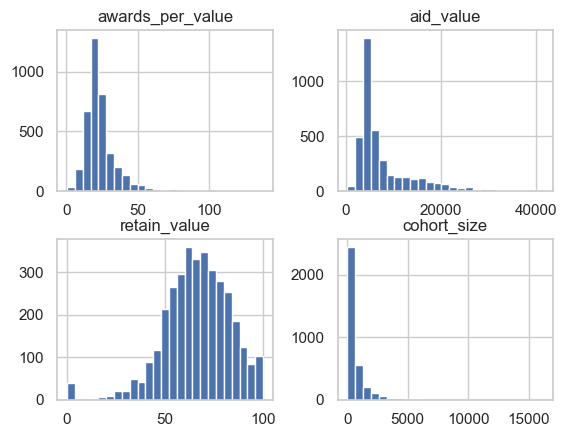

In [11]:
df.hist(column=['awards_per_value', 'aid_value', 'retain_value', 'cohort_size'], bins=25);

These histograms easily demonstrate the outliers in the columns we previously saw. Some of these variables, in particular the _retain_value_ variable, will be used to answer one of our questions therefore the outliers will need to be handled to produce more accurate insights. We can also see some right skewness in the _awards_per_value_, _aid_value_ and _cohort_size_ variables and left skewness in _retain_value_.

In [12]:
df_object = df.select_dtypes(include='object')
object_col_list = list(df_object.columns)
cat_col_list = object_col_list[3:5]
object_col_list = object_col_list[6:]
df_cat = df.copy()

for col in object_col_list:
    df_cat[f'{col}_flag'] = np.where(df_cat[col].isna(), 0, 1)
df_cat.drop(columns=object_col_list, axis=1, inplace=True)

for var in cat_col_list:
    df_cat = pd.concat([df_cat.drop(var, axis=1), pd.get_dummies(df_cat[var], prefix=var, prefix_sep='_')], axis=1)


In [13]:
df_cat.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'basic',
       'student_count', 'awards_per_value', 'awards_per_state_value',
       'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value',
       'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value',
       'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value',
       'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
       'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer',
   

Here we converted 6 object columns (_hbcu_, _flagship_, _site_, _similar_, _counted_pct_ and _nicknames_) into binary flag columns, which have the suffix _flag_. We also made dummy columns for 2 categorical variables _level_ and _control_ which have the nomenclature of the original column as a prefix and the specifc category as the suffix.

### Missing Data

In [14]:
null_cols_per_row = list(df_cat.isnull().sum(axis=1))
null_cols_per_row_count = [[x, null_cols_per_row.count(x), round((x/num_cols)*100,2)] for x in set(null_cols_per_row)]
df_missing_rows = pd.DataFrame(null_cols_per_row_count, columns =['No. of missing columns', 'Count of rows', 'Percentage of missing columns'])
df_missing_rows

,No. of missing columns,Count of rows,Percentage of missing columns
0,0,238,0.00
1,2,31,3.17
2,4,1,6.35
3,8,8,12.70
4,12,1,19.05
5,17,1039,26.98
6,19,934,30.16
7,21,1126,33.33
8,22,13,34.92
9,23,88,36.51


In [15]:
df[object_col_list].isna().sum().reset_index(name='missing count')

,index,missing count
0,hbcu,3704
1,flagship,3748
2,site,19
3,similar,219
4,counted_pct,426
5,nicknames,3488


The '**df_missing_rows**' dataframe above shows the number of NaN values in a row, the number of occurances in the full dataset, and finally the percentage of missing row data in the dataset. It seems that the max number of missing columns in a row is 31 which accounts for nearly 50% of data.

Now that we have already converted some object columns to flags or dummy variables, we have already dealt with some missing data in these columns and so the maximum number of NaN values in any row in the dataset has decreased to 31. Given that not all of the columns will be needed to answer our questions, I'll hold off on dealing with the NaN values until it's necessary to do so.

In [16]:
col_percent_missing = df_cat.isnull().sum() * 100 / len(df_cat)
col_count_missing = df_cat.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': df_cat.columns,
                                 'percent_missing': col_percent_missing,
                                 'count_missing': col_count_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df.head(20)

,column_name,percent_missing,count_missing
vsa_grad_after6_transfer,vsa_grad_after6_transfer,92.890995,3528
vsa_grad_after4_transfer,vsa_grad_after4_transfer,92.890995,3528
vsa_enroll_elsewhere_after6_transfer,vsa_enroll_elsewhere_after6_transfer,92.890995,3528
vsa_enroll_after6_transfer,vsa_enroll_after6_transfer,92.890995,3528
vsa_grad_elsewhere_after6_transfer,vsa_grad_elsewhere_after6_transfer,92.890995,3528
vsa_grad_elsewhere_after4_transfer,vsa_grad_elsewhere_after4_transfer,92.890995,3528
vsa_enroll_elsewhere_after4_transfer,vsa_enroll_elsewhere_after4_transfer,92.890995,3528
vsa_enroll_after4_transfer,vsa_enroll_after4_transfer,92.890995,3528
vsa_enroll_after4_first,vsa_enroll_after4_first,92.654028,3519
vsa_enroll_elsewhere_after6_first,vsa_enroll_elsewhere_after6_first,92.654028,3519


17 columns have over 90% of their data missing but all the NaN values in these columns correspond with each othe and are in the same rows. This makes it appropriate to drop these columns from the dataset. All 17 of these columns are the vsa_ columns which relate to the number of full-time students who enrolled/transferred at different time points.

In [17]:
no_missing = list(df_cat.columns[df_cat.isna().any() == False])
print(f"The number of columns with no missing data: {len(no_missing)}")
vsa_missing_cols = list(df_cat.columns[df_cat.isnull().mean() > 0.90])
print(f"Columns with >90% missing data and will be dropped: {vsa_missing_cols}")
df_cat.drop(vsa_missing_cols, axis=1, inplace=True)

The number of columns with no missing data: 29
Columns with >90% missing data and will be dropped: ['vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer', 'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer', 'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer']


In [18]:
new_null_cols_per_row = list(df_cat.isnull().sum(axis=1))
new_null_cols_per_row_count = [[x, new_null_cols_per_row.count(x), round((x/num_cols)*100,2)] for x in set(new_null_cols_per_row)]
new_df_missing_rows = pd.DataFrame(new_null_cols_per_row_count, columns =['No. of missing columns', 'Count of rows', 'Percentage of missing columns'])
new_df_missing_rows

,No. of missing columns,Count of rows,Percentage of missing columns
0,0,1285,0.00
1,2,965,3.17
2,4,1128,6.35
3,5,13,7.94
4,6,88,9.52
5,7,27,11.11
6,9,180,14.29
7,10,1,15.87
8,11,107,17.46
9,14,4,22.22


Now that the vsa_ columns have been dropped, the largest number of missing data in a row has dropped to 14 (22% of row data).

### Correlation between variables

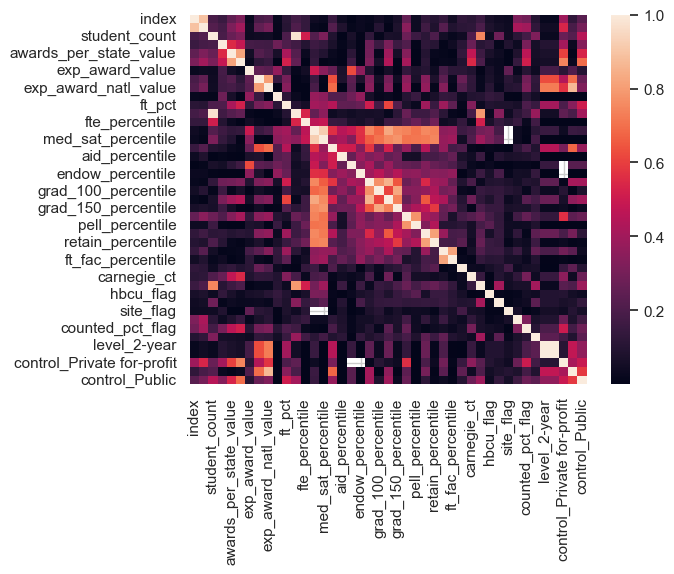

In [19]:
sns.heatmap(df_cat.corr(numeric_only=True).abs());

Because of the large number of numerical variables in the dataset, the correlation matrix between the variables is a little difficult to interpret. Most squares appear dark indicating that the correlation coefficient between the majority of variables is less that 0.2 and therefore weak. The dataframe below, '**df_corr**', contains pairwise variables and their corresponding Pearson correlation coefficent (as an absolute) which is more interpretable.

In [20]:
au_corr = df_cat.corr(numeric_only=True).abs()
upper = au_corr.where(np.triu(np.ones(au_corr.shape), k=1).astype(bool))
df_corr = upper.stack().sort_values(ascending=False).reset_index(name='corr')
df_corr.rename(columns={"level_0": "var1", "level_1": "var2"}, inplace=True);

In [21]:
df_corr.head(15)

,var1,var2,corr
0,level_2-year,level_4-year,1.000000
1,student_count,fte_value,0.974339
2,med_sat_value,med_sat_percentile,0.920985
3,index,unitid,0.891251
4,exp_award_natl_value,control_Private not-for-profit,0.869761
5,grad_100_value,grad_150_value,0.853982
6,grad_100_percentile,grad_150_percentile,0.824847
7,med_sat_value,grad_150_value,0.824688
8,ft_fac_value,ft_fac_percentile,0.820059
9,awards_per_state_value,awards_per_natl_value,0.818052


In [22]:
df_corr.tail(15)

,var1,var2,corr
884,exp_award_natl_value,aid_percentile,0.000234
885,aid_percentile,control_Private not-for-profit,0.000217
886,aid_percentile,control_Private for-profit,0.000169
887,aid_percentile,level_4-year,0.000149
888,aid_percentile,level_2-year,0.000149
889,med_sat_percentile,counted_pct_flag,0.000140
890,fte_percentile,level_4-year,0.000115
891,fte_percentile,level_2-year,0.000115
892,exp_award_natl_value,fte_percentile,0.000110
893,state_sector_ct,level_4-year,0.000074


As expected, _level_2-year_ and _level_4-year_ have a correlation of 1 due to the fact that their parent column _level_ only had 2 categories. A value of 1 in one column will always relate to a value of 0 in the other. For the most part, the other pairwise variables that appear in the top 15 largest correlation coefficients are very closely correlated e.g.:  
- _med_sat_value_ & _med_sat_percentile_ (as percentile is calculated using value)  
- _index_ & _unitid_ (as they are both unique keys)  
- _grad_100_value_ & _grad_150_value_ (as _grad_150_value is taken at a later time point to _grad_100_value and will always be greater)

If building a statistical model, we can reduce the risk of overfitting and use only one variable in these pairs instead of both.

On the other hand, it seems _aid_percentile_ appears the most frequently in the bottom 15 smallest correlation coefficients although it mainly appears with the dummy variables for _level_ and _control_. Following on from that, _level_2-year_ and _level_4-year_ appear together 3 times with the same coefficient, showing that _level_ has barely any corrleation with a few sample of variables at least.

Now that we have completed some data cleaning and produced a correlation coefficient dataframe, we are in a good position to look at the first question.

## Question 1: What effect does an institution's characteristics have on their graduation rate?

The main outcomes of interest for this question are _grad_100_value_ and _grad_150_value_ which are the percentage of undergraduates who complete their degree within 100% and 150% of the expected time respectively.

As we will be creating models using one/both of these variables, we first need to deal with any NaN values. Both _grad_100_value_ and _grad_150_value_ have 331 NaN values each and they all correspond with each other in the same rows. Dropping 331 rows out of 3798 still leaves us with 3467 rows - a large enough dataset to train models on. Alternatively, I could have replaced these NaN values with the mean of the column but that could have impacted the model outcomes too much.

In [23]:
print(df_cat['grad_100_value'].isna().sum())
print(df_cat['grad_150_value'].isna().sum())
print(df_cat[(df_cat['grad_100_value'].isna() == True) & (df_cat['grad_150_value'].isna() == True)].shape[0])
df_grad_clean = df_cat.dropna(subset=['grad_150_value'])

331
331
331


It is unsurprising that _grad_100_value_ is strongly correlated with _grad_150_value_ with a coefficient of 0.854. It seems reasonable to assume that any models that will predict _grad_100_value_ will be very similar to ones for _grad_150_value_ therefore we would only need to include one of these variable in predicting graduation rate.

The histograms below show that _grad_150_value_ most follows a normal distribution therefore, for the remainder of this question, _grad_150_value_ will be our only response variable.

In [24]:
df_grad_clean['grad_100_value'].corr(df_grad_clean['grad_150_value'])

0.8539821402963937

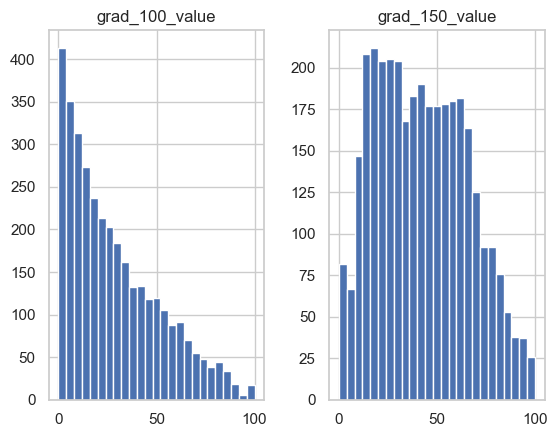

In [25]:
df_grad_clean.hist(column=['grad_100_value', 'grad_150_value'], bins=25);

The dataset has too many columns for us to use in a model to predict graduation rates so, to avoid overfitting, we need to look at '**df_corr**' to understand which variables have the largest correlation to _grad_150_value_.

In [26]:
df_corr[(df_corr['var1'] == 'grad_150_value') | (df_corr['var2'] == 'grad_150_value')]

,var1,var2,corr
5,grad_100_value,grad_150_value,0.853982
7,med_sat_value,grad_150_value,0.824688
17,med_sat_percentile,grad_150_value,0.753941
25,grad_150_value,grad_150_percentile,0.735880
39,grad_150_value,retain_value,0.651357
45,ft_pct,grad_150_value,0.610579
46,grad_100_percentile,grad_150_value,0.608645
63,aid_value,grad_150_value,0.518338
81,grad_150_value,retain_percentile,0.464761
93,awards_per_natl_value,grad_150_value,0.439258


Our response variable seems to be strongly correlated with: _med_sat_value_, _aid_value_, _retain_value_, and _ft_pct_; all having a Pearson's R coefficient > 0.6.

Some _value variables also have related _percentile variables that seem strongly correlated with _grad_150_value_, but these will not be used in the statistical modeling as the coefficients for the _value columns are always greater. The variables listed are also all float data types therefore, for the first model, we will use these and explore adding categorical variables later.

I will note here too that I am quite surprised that there is weak correlation with _cohort_size_ (0.1275) and _student_count_ (0.0681). My initial assumptions were that the size of the student body undertaking the degree would play a role in determining the graduation rate. The histogram below shows the very weak correlation with  _cohort_size_ - while _grad_150_value_ increases, the _cohort_size_ stays uniform with roughly the same variation.

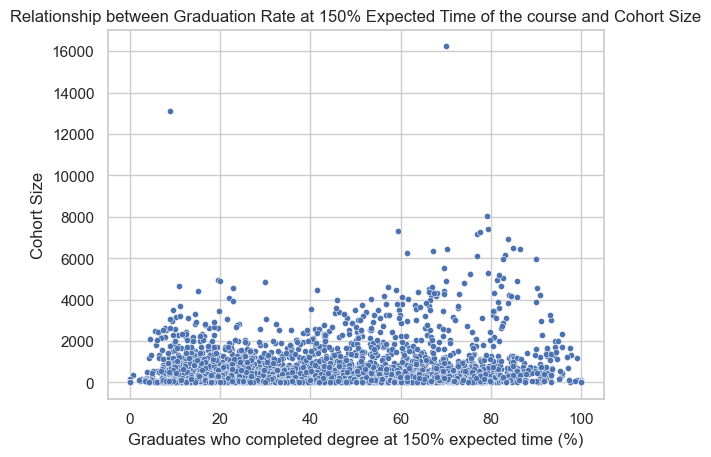

In [27]:
sns.scatterplot(x="grad_150_value", y="cohort_size", data=df_grad_clean, s=20)
plt.title("Relationship between Graduation Rate at 150% Expected Time of the course and Cohort Size")
plt.xlabel('Graduates who completed degree at 150% expected time (%)');
plt.ylabel('Cohort Size');
plt.show()

On the other hand, plotting _grad_150_value_ with two of the highest correlated variables _med_sat_value_ and _aid_value_ look like very different graphs. We can clearly see a positive linear relationship with a relatively even spread when plotted against _med_sat_value_ which supports the corrleation coefficient of 0.8247.

Out of curiosity, I started experimenting with the flag columns to get an idea of which categorical columns might help predict our outcome of interest. In the first histogram, I have included the _hbcu_flag_ (flag that indicates Historically Black College and Universities) and, although we do see a small cluster of the ‘1’ data points in the bottom left corner in orange, the correlation coefficient with the response variable is 0.08 therefore very weak. In the second histogram, it's clear that being a 4-year institution has a more positive correlation with graduation rate than being a 2-year school.

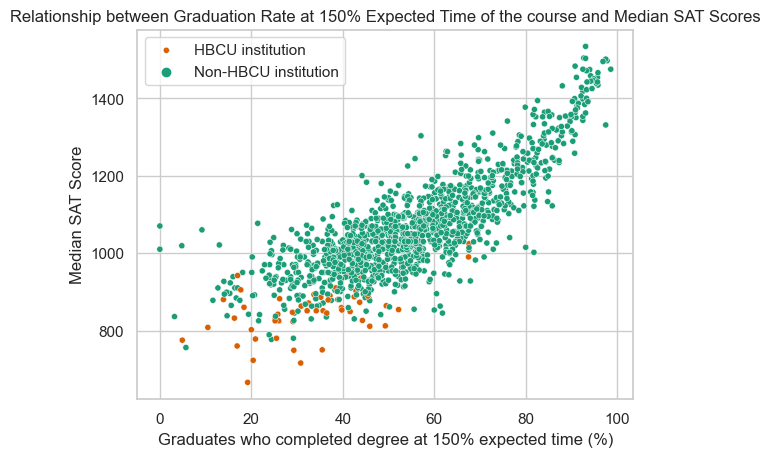

In [28]:
sns.scatterplot(x="grad_150_value", y="med_sat_value", data=df_grad_clean, hue="hbcu_flag", palette="Dark2", s=20)
plt.title("Relationship between Graduation Rate at 150% Expected Time of the course and Median SAT Scores")
plt.xlabel('Graduates who completed degree at 150% expected time (%)');
plt.ylabel('Median SAT Score');
plt.legend(['HBCU institution', 'Non-HBCU institution'])
plt.show()

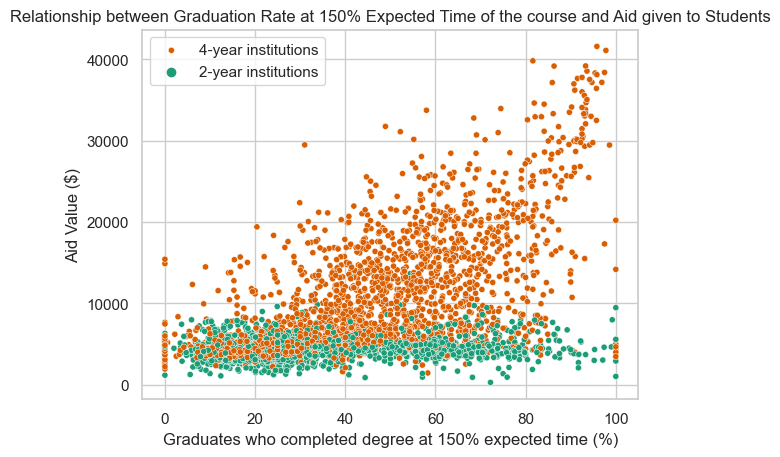

In [29]:
sns.scatterplot(x="grad_150_value", y="aid_value", hue='level_4-year', data=df_grad_clean, palette="Dark2", s=20)
plt.title("Relationship between Graduation Rate at 150% Expected Time of the course and Aid given to Students")
plt.xlabel('Graduates who completed degree at 150% expected time (%)');
plt.ylabel('Aid Value ($)');
plt.legend(['4-year institutions', '2-year institutions'])
plt.show()

We're ready to try our first linear regression model that uses only float type variables, where y (response variable) is _grad_150_value_ and our X matrix (predictors) is made up of _med_sat_value_, _aid_value_, _retain_value_, _ft_pct_ and _endow_value_. 

1285 rows were left when dropping NAs in all the variables used in the model - approximately a third of the original dataset - and I also chose a test-train split of 1:2 which left 424 data points in the test set.

In [30]:
random.seed(234)
num_vars = df_grad_clean[['grad_150_value', 'med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value']]
df_dropna = num_vars.dropna(axis=0)
print(df_dropna.shape[0])
X = df_dropna[['med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value']]
y = df_dropna['grad_150_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=12)
grad_100_model = LinearRegression()
grad_100_model.fit(X_train, y_train)

y_test_preds = grad_100_model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_test_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_preds)}")

1285
R2 Score: 0.7803206929416227
Mean Squared Error: 70.09495520663151


The R squared score of the model was fairly high at 0.7803, which means that 78% of variance in predictions can be explained by the model. 

In [31]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,52.8,52.260570,0.539430
1,0.0,52.306281,-52.306281
2,78.8,73.144305,5.655695
3,51.6,58.185406,-6.585406
4,70.1,73.074175,-2.974175


We can evaluate our model by plotting the predictions of the model against the actual graduation rates in the test set, as well as plotting the predictions against the difference.

In both plots, the high R2 value can be seen by the points being close to the black lines although there are outliers or bad predictions. The closer the data points are to the lines, the more accurate the model. The scatterplots both show that for lower graduation rates (between 0-50%), the variation about the line is slightly larger than for higher graduation rates. This non-constant variation about the line is more visible in the second scatterplot as we can see a dsitinct funnel shape in the points which indicates heteroscedasticity, meaning that our model's predictions are more likely to be inaccurate for lower graduation rates.

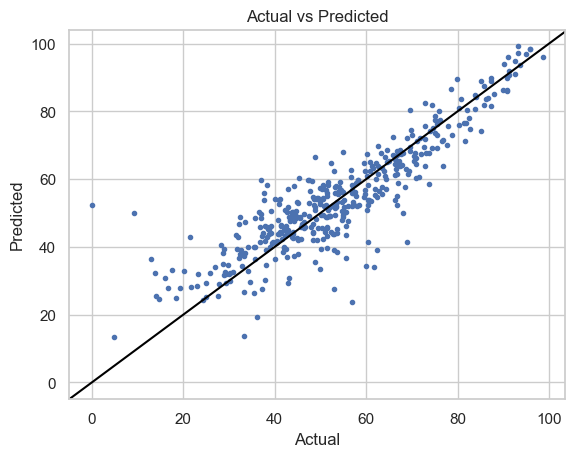

In [32]:
plt.plot(preds_vs_act['actual'], preds_vs_act['preds'], 'bo', markersize = 3);
plt.axline((0, 0), slope=1, color="black")
plt.title("Actual vs Predicted")
plt.xlabel('Actual');
plt.ylabel('Predicted');

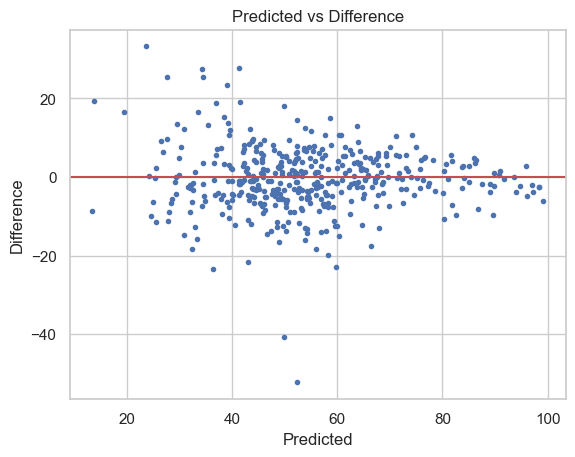

In [33]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo', markersize = 3);
plt.axhline(0, color='r')
plt.title("Predicted vs Difference")
plt.xlabel('Predicted');
plt.ylabel('Difference');

Now we can explore the effect of categorical variables on modeling the graduation rate, in particular _state_, _level_ (2 year vs 4 year institutions) and _control_ (Public, Private not-for-profit, or Private for-profit institutions).

As we created dummy variables for _level_ and _control_, we can see at the beginning of Question 1 what the correlation coefficient was between _grad_150_value_ and each level in our categorical variables. For _state_ however, as there are 52 different levels, creating dummy variables for each one is inapproriate and so we used a one-way ANOVA test where the null hypothesis is that the _grad_150_value_ and _state_ have the same population mean.

The p-value is <0.05 (our alpha) therefore we can conclude that the F statistic of 6.002 is statistically significant and can reject the null hypothesis in favour of the alternative - that the population means are not the same (and so _state_ and _grad_150_value_ are correlated).

In [34]:
GroupLists = df_grad_clean.groupby('state')['grad_150_value'].apply(list)
AnovaResults = f_oneway(*GroupLists)
print('F Statistic for Anova is: ', AnovaResults[0])
print('P-Value for Anova is: ', AnovaResults[1])

F Statistic for Anova is:  6.00242379864376
P-Value for Anova is:  1.7615127062714775e-35


Our second model includes the same variables as our first one but with additional categorical variables. The same number of rows were left (1285) when dropping NAs in all the variables used.

The R squared score for this model is 0.7782 which means that it's marginally worse than the first one. Adding these categorical variables could have added some extra benefit to the predictions, but R squared works by increasing the penalty on the score for every variable added to the model, which means that adding the extra variables did not have enough of a benefit to outweigh the penalty.

In [35]:
random.seed(234)
num_cat_vars = df_grad_clean[['grad_150_value', 'med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value', 'level_4-year', 'control_Private for-profit', 'control_Private not-for-profit', 'control_Public']]
df_dropna = num_cat_vars.dropna(axis=0)
print(df_dropna.shape[0])
X2 = df_dropna[['med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value',  'level_4-year', 'control_Private for-profit', 'control_Private not-for-profit', 'control_Public']]
y2 = df_dropna['grad_150_value']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size= 0.33, random_state=12)
grad_100_model_cat = LinearRegression()
grad_100_model_cat.fit(X_train2, y_train2)

y2_test_preds = grad_100_model_cat.predict(X_test2)
print(f"R2 Score: {r2_score(y_test2, y2_test_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test2, y2_test_preds)}")


1285
R2 Score: 0.7781863886379288
Mean Squared Error: 70.7759659334406


## Question 2: Does full-time faculty have an effect on student retention?

Moving onto the second question, the main variables of interest are _retain_value_ (the percentage of freshman/first-year students retained for a second year) and _ft_fac_value_ (percentage of full-time employees).

We can see below that _retain_value_ has more missing data than _ft_fac_value_ with 263 missing rows compared to 13. This only accounts for approxiamtely 7% of the column's data therefore we will drop the rows with missing values in our 2 main variables, leaving us with 3526 rows.

In [36]:
q2_df = df_cat[['retain_value', 'ft_fac_value', 'retain_percentile', 'ft_fac_percentile', 'level_4-year', 'level_2-year', 'control_Private for-profit', 'control_Private not-for-profit', 'control_Public']]
q2_df.describe()

,retain_value,ft_fac_value,retain_percentile,ft_fac_percentile,level_4-year,level_2-year,control_Private for-profit,control_Private not-for-profit,control_Public
count,3535.000000,3785.000000,3535.000000,3785.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000
mean,66.231853,45.107477,49.226591,49.473448,0.615850,0.384150,0.261190,0.328594,0.410216
std,17.033907,24.726902,29.175248,29.014201,0.486458,0.486458,0.439341,0.469764,0.491938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.100000,25.700000,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.900000,41.500000,49.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,78.100000,63.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
col_percent_missing = q2_df.isnull().sum() * 100 / len(df)
col_count_missing = q2_df.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': q2_df.columns,
                                 'percent_missing': col_percent_missing,
                                 'count_missing': col_count_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df.head(20)

,column_name,percent_missing,count_missing
retain_value,retain_value,6.924697,263
retain_percentile,retain_percentile,6.924697,263
ft_fac_value,ft_fac_value,0.342285,13
ft_fac_percentile,ft_fac_percentile,0.342285,13
level_4-year,level_4-year,0.000000,0
level_2-year,level_2-year,0.000000,0
control_Private for-profit,control_Private for-profit,0.000000,0
control_Private not-for-profit,control_Private not-for-profit,0.000000,0
control_Public,control_Public,0.000000,0


In [38]:
q2_df_clean = q2_df.dropna(subset=['retain_value', 'ft_fac_value'])
q2_df_clean.shape[0]

3526

By plotting histograms of the data in _retain_value_ and _ft_fac_value_ we see that both variables have an unusually large number of outliers - the full-time faculty variable has outliers at '100' whereas the student retention variable has outliers at '0'.

array([[<Axes: title={'center': 'retain_value'}>,
        <Axes: title={'center': 'ft_fac_value'}>]], dtype=object)

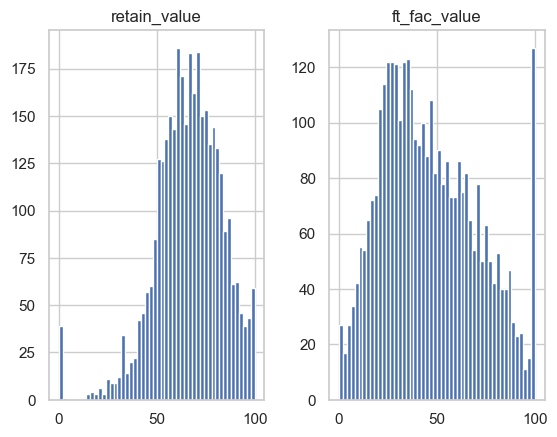

In [39]:
q2_df_clean.hist(column=['retain_value', 'ft_fac_value'], bins=50)

The scatterplot below shows the effect of this futher as the graph looks to have a distinct "box". These outliers could affect their correlation and any further statistical analysis that we do on these variables and so they need to be removed.

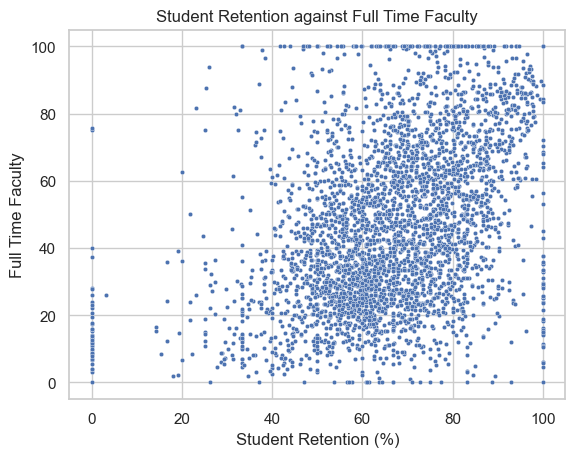

In [40]:
sns.scatterplot(x="retain_value", y="ft_fac_value", data=q2_df_clean, s=10)
plt.title("Student Retention against Full Time Faculty")
plt.xlabel('Student Retention (%)');
plt.ylabel('Full Time Faculty');

Prior to removing the outliers, the correlation coefficient between _retain_value_ and _ft_fac_value_ is 0.3827, therefore quite weak.

In [41]:
q2_df_clean['retain_value'].corr(q2_df_clean['ft_fac_value'])

0.3826807844228234

The values in the lists below support the histograms in that we see in the top row for _ft_fac_value_, 113 institutions have 100% full-time faculty. While this is a large amount of outliers, the rest of the rows are within the interquartile range and are therefore likely to be more accurate. 23 rows have a 0 value but as this fits with the curve shown in the histogram, we'll leave these rows for now.

In [42]:
q2_df_clean['ft_fac_value'].value_counts().sort_values(ascending=False).head(20)

100.0    113
33.3      25
0.0       23
50.0      19
66.7      17
25.0      15
75.0      15
28.6      14
24.0      14
23.3      14
26.7      13
20.0      13
33.9      13
36.4      12
20.5      11
37.5      11
40.0      11
34.8      11
34.6      11
48.9      11
Name: ft_fac_value, dtype: int64

Again, this list backs up the histogram - 52 rows have an '100' retain value and after this top row, the rest of the retain values relate to the interquartile range. For this variable, the '0' value is the culprit - 39 rows in the dataframe have '0' value which we know is more likely to be the outlier becasue there is only one other row in the list with a retain_value lower than 50.

In [43]:
q2_df_clean['retain_value'].value_counts().sort_values(ascending=False).head(20)

100.0    52
66.7     44
0.0      39
50.0     39
75.0     27
33.3     27
83.3     22
60.0     22
58.3     21
62.5     19
78.6     18
60.4     16
78.9     16
69.2     16
80.0     16
61.4     15
62.8     15
71.7     15
71.9     14
59.2     14
Name: retain_value, dtype: int64

In [44]:
q2_df_no_out = q2_df_clean[(q2_df_clean['retain_value'] != 0) & (q2_df_clean['retain_value'] != 100) & (q2_df_clean['ft_fac_value'] != 100)]
q2_df_no_out

,retain_value,ft_fac_value,retain_percentile,ft_fac_percentile,level_4-year,level_2-year,control_Private for-profit,control_Private not-for-profit,control_Public
0,63.1,82.8,17.0,89.0,1,0,0,0,1
1,80.2,92.4,70.0,98.0,1,0,0,0,1
2,37.5,67.2,2.0,71.0,1,0,0,1,0
3,81.0,65.5,72.0,56.0,1,0,0,0,1
4,62.2,67.0,15.0,58.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
3792,33.3,28.6,1.0,37.0,0,1,0,0,1
3793,33.3,10.7,1.0,3.0,1,0,0,1,0
3794,74.4,44.4,47.0,39.0,1,0,0,1,0
3795,77.8,29.6,81.0,74.0,1,0,1,0,0


After removing the '0' and '100' outlier values that were forming the box, the below plot for _retain_value_ and _ft_fac_value_ no longer has a "box".

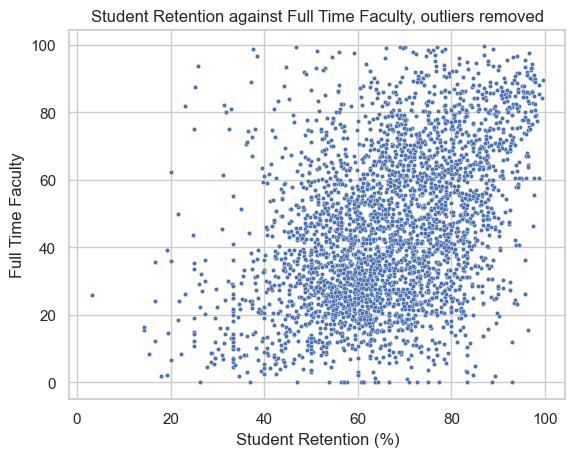

In [45]:
sns.scatterplot(x="retain_value", y="ft_fac_value", data=q2_df_no_out, s=10)
plt.title("Student Retention against Full Time Faculty, outliers removed")
plt.xlabel('Student Retention (%)');
plt.ylabel('Full Time Faculty');

In [46]:
corr_test_output = pearsonr(q2_df_no_out['retain_value'], q2_df_no_out['ft_fac_value'])
print(f"Correlation coefficient: {corr_test_output[0]}")
print(f"Two tailed p-value: {corr_test_output[1]}")

Correlation coefficient: 0.4207763806103621
Two tailed p-value: 8.900805096197867e-143


Removing the outliers improved the correlation of the 2 variables as the coefficient is now 0.4208, an increase of 0.0381.

Pearson's r (which is what has ben utilised to measure correlation in the notebook until now) is not robust to outliers so it was expected that the score accuracy would improve by removing them.

The p value for T score is <0.05 therefore statistically significant. This means that we can reject null hypothesis and accept the alternative hypothesis that there is a statistically significant association between _retain_value_ and _ft_fac_value_.

Now that we know the proportion of full-time faculty does have an impact on student retention, I want to explore what the effect would be of other categorical variables on this relationship. The scatterplot below is the same plot as above but with the _level_ flag to show 2-year and 4-year institutions. While the two groups do seem mixed, we see a slight clustering of the 2-year institutions towards the bottom right (in blue), and a clustering of 4-year instituions in the top right (in orange) implying that schools that offer longer degree courses tend to have a higher proportion of full-time faculty and a better chance of retaining the first-year students going into second year.

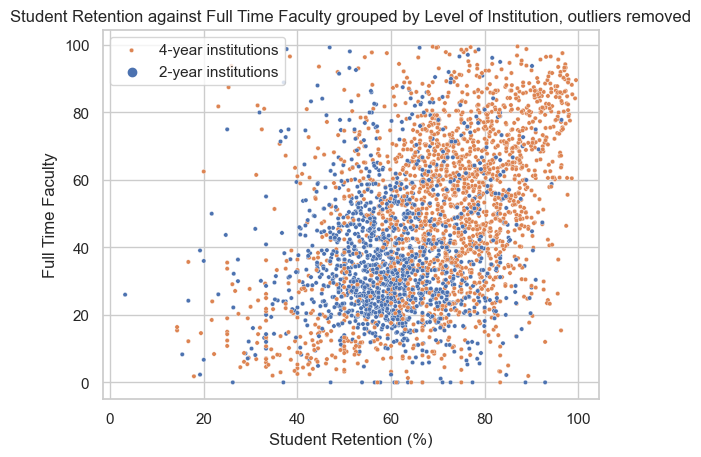

In [47]:
sns.scatterplot(x="retain_value", y="ft_fac_value", data=q2_df_no_out, hue="level_4-year", s=10)
plt.title("Student Retention against Full Time Faculty grouped by Level of Institution, outliers removed")
plt.xlabel('Student Retention (%)');
plt.ylabel('Full Time Faculty');
plt.legend(['4-year institutions', '2-year institutions'])
plt.show()

In [48]:
model_vars = []
model_r2_score = []
model_mse = []

In [49]:
# Model: X variables - ft_fac_value
random.seed(234)
X3 = q2_df_no_out['ft_fac_value'].values.reshape(-1, 1)
y3 = q2_df_no_out['retain_value'].values.reshape(-1, 1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size= 0.33, random_state=12)
retain_model = LinearRegression()
retain_model.fit(X_train3, y_train3)

y3_test_preds = retain_model.predict(X_test3)
print(f"R2 Score: {r2_score(y_test3, y3_test_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test3, y3_test_preds)}")

model_vars.append('[\'ft_fac_value\']')
model_r2_score.append(r2_score(y_test3, y3_test_preds))
model_mse.append(mean_squared_error(y_test3, y3_test_preds))

R2 Score: 0.19123395153598366
Mean Squared Error: 195.2211639075491


To test how well _ft_fac_value_ is at predicting _retain_value_ on it's own, we built a linear regression model with a test-train split of 1:2. The R squared value for the model came out to be 0.1912, meaning that full-time faculty is quite poor at predicting student retention, which is unsurprising, given the low correlation coefficient that it had of 0.4208.

Let's test if the model improves by adding the _level_ and _control_ flag variables, first individually and then together.

In [50]:
def retain_model_fn(cat_list):
    random.seed(234)
    num_cat_vars = q2_df_no_out[cat_list]
    df_dropna = num_cat_vars.dropna(axis=0)
    X = df_dropna[cat_list[1:]]
    y = df_dropna['retain_value']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=12)
    ln_model = LinearRegression()
    ln_model.fit(X_train, y_train)

    y_test_preds = ln_model.predict(X_test)
    
    model_vars.append(f"{cat_list[1:]}")
    model_r2_score.append(r2_score(y_test, y_test_preds))
    model_mse.append(mean_squared_error(y_test, y_test_preds))

In [51]:
cat_list = [
['retain_value', 'ft_fac_value', 'level_4-year'],
['retain_value', 'ft_fac_value', 'control_Private for-profit', 'control_Public'],
['retain_value', 'ft_fac_value', 'level_4-year', 'control_Private for-profit', 'control_Public']]

for list in cat_list:
    retain_model_fn(list)

In [52]:
model_dict = {'model_vars': model_vars, 'r2_score': model_r2_score, 'mse': model_mse}
retain_models_df = pd.DataFrame(model_dict)
retain_models_df

,model_vars,r2_score,mse
0,['ft_fac_value'],0.191234,195.221164
1,"['ft_fac_value', 'level_4-year']",0.228703,186.176929
2,"['ft_fac_value', 'control_Private for-profit',...",0.239988,183.452844
3,"['ft_fac_value', 'level_4-year', 'control_Priv...",0.248284,181.450256


We can see that the R2 score improves throughout the model testing, but only marginally overall. Adding in the control flags for Private for-profit and Public schools improved the model more than adding the 4-year level flag did but the combination of the two appears to have performed the best, although the R2 score is 0.2483 which still indicates a poor model.

Adding in categorical variables hasn't improved the relationship, and we can conclude that while the proportion of full-time faculty is correlated to student retention, it alone is not enough to explain the variance that we see in student retention going into second year.

## Question 3: Which type of institution awards the most degrees?

Moving onto the final question in this analysis, I want to explore which type of institution awards the most degrees to its students. For this question, I'll be focusing on _level_ and _control_ as the way to categorise the "type" of institution, and _awards_per_value_ will be the main variable to show the number of awards given in a time period per 100 full-time students.

In [53]:
q3_control_count = df['control'].value_counts().reset_index(name='count')
q3_control_group = df.groupby(["control"])['awards_per_value'].mean().reset_index(name='avg_award')

df_q3_control_final = pd.merge(q3_control_count, q3_control_group, left_on='index', right_on='control')
df_q3_control_final = df_q3_control_final[['control', 'count', 'avg_award']]
df_q3_control_final


,control,count,avg_award
0,Public,1558,19.206739
1,Private not-for-profit,1248,22.995433
2,Private for-profit,992,30.629435


We can see that there are far more Public schools however when we combine the private schools together, we see that they are the most common in the US.

The mean awards given to students follows the opposite trend - private for-profit schools give out the most awards and public the least. The mean and the spread of data points by _control_ is shown in the boxplot below where we can see that the interquartile range of awards given from private for-profit schools is much larger than the other two types of control.

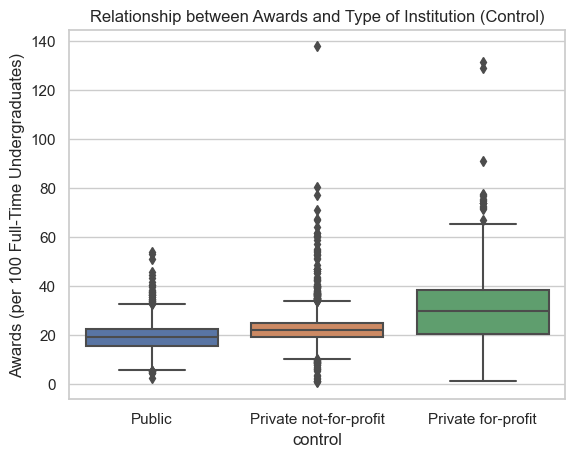

In [54]:
sns.boxplot(x="control", y="awards_per_value", data=df)
plt.title("Relationship between Awards and Type of Institution (Control)")
plt.ylabel('Awards (per 100 Full-Time Undergraduates)');
plt.show()

In [55]:
q3_level_count = df['level'].value_counts().reset_index(name='count')
q3_level_group = df.groupby(["level"])['awards_per_value'].mean().reset_index(name='avg_award')

df_q3_level_final = pd.merge(q3_level_count, q3_level_group, left_on='index', right_on='level')
df_q3_level_final = df_q3_level_final[['level', 'count', 'avg_award']]
df_q3_level_final

,level,count,avg_award
0,4-year,2339,22.633690
1,2-year,1459,24.720082


Similarly, for _level_, we can see that 4-year institutions are far more common in the US than 2-year ones, but again the opposite trend is seen for _awards_per_value_ in that 2-year schools give out slightly more awards per 100 students.

The mean and the spread of data points by _level_ is shown in the boxplot below where we can see that while the mean is similar between the two types, the interquartile range of awards given from 2-year schools is larger than 4-year schools.

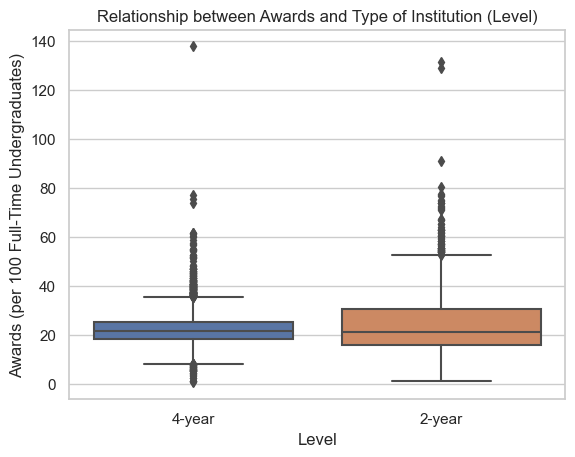

In [56]:
sns.boxplot(x="level", y="awards_per_value", data=df)
plt.title("Relationship between Awards and Type of Institution (Level)")
plt.xlabel('Level');
plt.ylabel('Awards (per 100 Full-Time Undergraduates)');
plt.show()

Lastly, let's look at the count and the average awards given for combinations of _level_ and _control_ institutions.

In [57]:
df_q3 = df.groupby(["control", "level"]).size().reset_index(name="count")
df_q3['percent'] = round((df_q3['count']/df.shape[0])*100,2)
df_q3['mean_awards_per_value'] = df.groupby(["control", "level"])['awards_per_value'].mean().to_list()
df_q3.sort_values(by='count', ascending=False)

,control,level,count,percent,mean_awards_per_value
3,Private not-for-profit,4-year,1180,31.07,22.519407
4,Public,2-year,926,24.38,18.571814
5,Public,4-year,632,16.64,20.137025
1,Private for-profit,4-year,527,13.88,25.883681
0,Private for-profit,2-year,465,12.24,36.007957
2,Private not-for-profit,2-year,68,1.79,31.255882


4-year Private not-for-profit schools are the most common, followed by Public schools, 2 years and then 4 years.

We can also see that approximately 95% of Private not-for-profit schools are 4-year institutions as opposed to 2-year ones, but the split between 2-year and 4-year is more even for Public schools (~60% 2-year) and Private for-profit (~47% 2-year).

Similar to the trends we saw earlier, the 2 least common types of institutions have the highest mean of awards given: 36.0 for Private for-profit schools and 31.3 for Private not-for-profit schools, both 2-year types.

The boxplot below shows the mean and the spread of awards given first by _level_ and then _control_. While the number of awards given does increase from Public, to Private not-for-profit, then Private for-profit for both 2-year and 4-year institutions, we do see that fewer awards are given out by 4-year schools than 2-year ones.

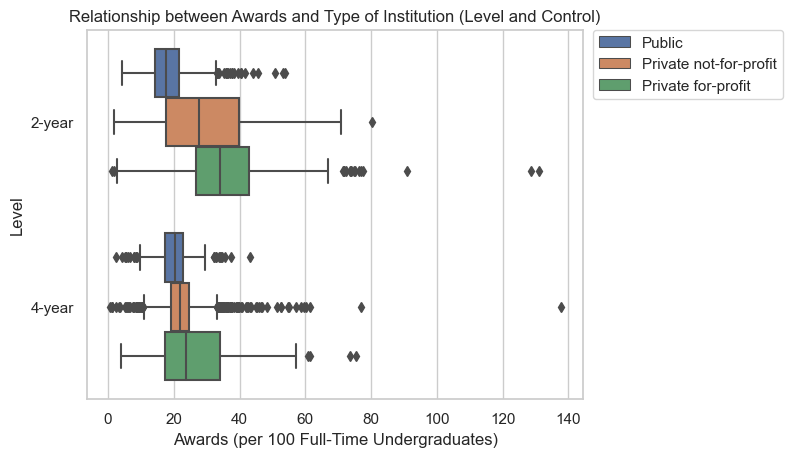

In [58]:
plot = sns.boxplot(data=df, x="awards_per_value", y="level", hue="control", order=["2-year", "4-year"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plot.set(xlabel = 'Awards (per 100 Full-Time Undergraduates)', ylabel = 'Level', title='Relationship between Awards and Type of Institution (Level and Control)')
plt.show()

Now we will explore how the number of awards given by these different types of institutions differ by state.

In [59]:
df_q3 = df.groupby(['state'])['awards_per_value'].mean().reset_index(name="avg_awards")
df_q3.head()

,state,avg_awards
0,Alabama,19.514493
1,Alaska,18.414286
2,Arizona,25.563492
3,Arkansas,21.970833
4,California,22.771429


In [60]:
df_q3_2 = df.groupby(['state', 'level'])['awards_per_value'].count().reset_index()
df_q3_level = pd.pivot_table(df_q3_2, values='awards_per_value', index=['state'], columns=['level']).reset_index()
df_q3_level.fillna(0, inplace=True)

df_q3_level['2-year_perc'] = round(df_q3_level['2-year']/(df_q3_level['2-year']+df_q3_level['4-year']), 4)
df_q3_level['4-year_perc'] = round(df_q3_level['4-year']/(df_q3_level['2-year']+df_q3_level['4-year']), 4)

df_q3_level.drop(columns=['2-year', '4-year'], inplace=True)

df_q3_level_final = pd.merge(df_q3_level, df_q3, on='state').sort_values(by=['avg_awards'], ascending=False).head(15)
df_q3_level_final['difference'] = df_q3_level_final['4-year_perc'] - df_q3_level_final['2-year_perc']
df_q3_level_final

,state,2-year_perc,4-year_perc,avg_awards,difference
9,Florida,0.2557,0.7443,26.992614,0.4886
44,Utah,0.1667,0.8333,26.853333,0.6666
25,Missouri,0.3495,0.6505,26.739806,0.3010
23,Minnesota,0.3663,0.6337,25.940594,0.2674
2,Arizona,0.5079,0.4921,25.563492,-0.0158
15,Iowa,0.2951,0.7049,25.536066,0.4098
16,Kansas,0.4677,0.5323,25.388710,0.0646
42,Tennessee,0.3298,0.6702,25.184043,0.3404
38,Pennsylvania,0.3917,0.6083,25.163594,0.2166
47,Washington,0.4110,0.5890,24.993151,0.1780


Ordering each state by their mean number of awards given per 100 students, we can see the split of 2-year and 4-year schools for the top 15 highest award giving states. It doesn't seem that there is a trend between the split in _level_, the variance in the difference is inconsistent although 14 of the top 15 have a higher percentage of 4-year schools. The difference in percentages in the split can range from 6% (Kansas) all the way to 90% (Vermont).

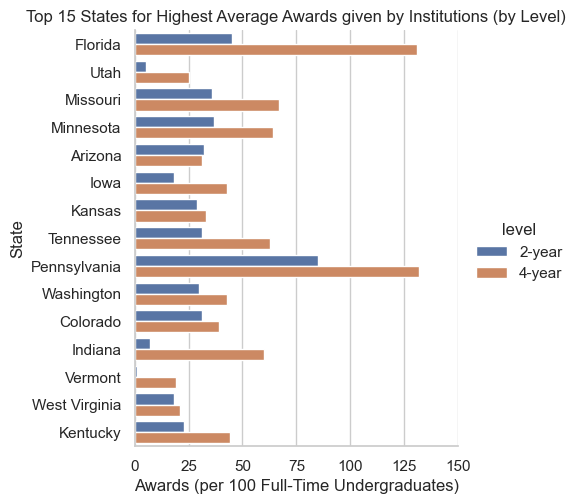

In [61]:
plot_level = sns.catplot(data=df_q3_2, kind='bar', x='awards_per_value', y='state', hue='level', order=df_q3_level_final['state'])
plot_level.set(xlim=(0, 150), ylabel="State", xlabel="Awards (per 100 Full-Time Undergraduates)", title='Top 15 States for Highest Average Awards given by Institutions (by Level)');

The bar chart above shows the difference in the actual number of awards given by the top 15 states shown above, by _level_. The most obvious point is the lack of a trend between the bars - there isn't a clear pattern as to whether 2-year or 4-year schools award more degrees, nor a pattern in the difference between the two for each state. I was also expecting to see most of the states have a higher proportion of 2-year schools, as we saw in our previous analysis that they on average awarded a larger number of degrees.

In [62]:
df_q3_3 = df.groupby(['state', 'control'])['awards_per_value'].count().reset_index()
df_q3_control = pd.pivot_table(df_q3_3, values='awards_per_value', index=['state'], columns=['control']).reset_index()
df_q3_control.fillna(0, inplace=True)

df_q3_control['Private for-profit_perc'] = round(df_q3_control['Private for-profit']/(df_q3_control['Private for-profit']+df_q3_control['Private not-for-profit']+df_q3_control['Public']), 4)
df_q3_control['Private not-for-profit_perc'] = round(df_q3_control['Private not-for-profit']/(df_q3_control['Private for-profit']+df_q3_control['Private not-for-profit']+df_q3_control['Public']), 4)
df_q3_control['Public_perc'] = round(df_q3_control['Public']/(df_q3_control['Private for-profit']+df_q3_control['Private not-for-profit']+df_q3_control['Public']), 4)

df_q3_control.drop(columns=['Private for-profit', 'Private not-for-profit', 'Public'], inplace=True)

df_q3_control_final = pd.merge(df_q3_control, df_q3, on='state').sort_values(by=['avg_awards'], ascending=False).head(15)
df_q3_control_final

,state,Private for-profit_perc,Private not-for-profit_perc,Public_perc,avg_awards
9,Florida,0.4943,0.2727,0.2330,26.992614
44,Utah,0.4667,0.2667,0.2667,26.853333
25,Missouri,0.3786,0.3592,0.2621,26.739806
23,Minnesota,0.3267,0.2574,0.4158,25.940594
2,Arizona,0.5556,0.0635,0.3810,25.563492
15,Iowa,0.1803,0.5082,0.3115,25.536066
16,Kansas,0.1290,0.3387,0.5323,25.388710
42,Tennessee,0.3298,0.4362,0.2340,25.184043
38,Pennsylvania,0.2995,0.4378,0.2627,25.163594
47,Washington,0.1918,0.2192,0.5890,24.993151


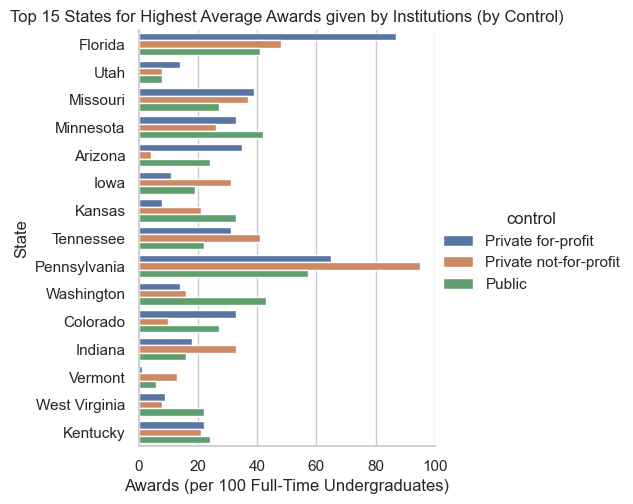

In [63]:
plot_control = sns.catplot(data=df_q3_3, kind='bar', x='awards_per_value', y='state', hue='control', order=df_q3_control_final['state'])
plot_control.set(xlim=(0, 100), ylabel="State", xlabel="Awards (per 100 Full-Time Undergraduates)", title='Top 15 States for Highest Average Awards given by Institutions (by Control)');

This bar chart mirrors the previous one but the schools in each state are now split up by _control_. Again we see the lack of a trend  between each state as well an within each state regarding the split of Public, Private for-profit and Private not-for-profit schools. From our previous analysis, I was expecting to see most states have a high proportion of Private for-profit schools, given that they seemed to award a higher numebr of degrees than the other two types of insitutions, but this is the case for only 5 out of the 15 seen in the chart (Florida, Utah, Missouri, Arizona and Colorado).